In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)
m

545

In [4]:
housing.shape

(545, 13)

In [5]:
#List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
#Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0 })
#Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
#check the dataframe
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [6]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

#train and test data set always have the smae rows
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [7]:
df_test.shape

(109, 13)

In [8]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
542,3620,2,1,1,0,1750000,1,0,0,0,0,0
496,4000,2,1,1,0,2695000,1,0,0,0,0,0
484,3040,2,1,1,0,2870000,0,0,0,0,0,0
507,3600,2,1,1,0,2590000,1,0,0,0,0,0
252,9860,3,1,1,0,4515000,1,0,0,0,0,0


In [9]:
df_Newtrain.shape

(436, 12)

In [10]:
#import warnings
#warnings.filerwarning('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(5)

C:\Users\mkmye\AppData\Local\Temp\ipykernel_29056\2743321035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])


,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
542,0.124199,0.2,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,0.0,0.081818,1.0,0.0,0.0,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0,0.096970,0.0,0.0,0.0,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,0.0,0.072727,1.0,0.0,0.0,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,0.0,0.239394,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()

In [12]:
X_Normtrain.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
542,0.124199,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y_Normtrain.head()

542    0.000000
496    0.081818
484    0.096970
507    0.072727
252    0.239394
Name: price, dtype: float64

In [14]:
Y = y_Normtrain.values
Y

array([0.        , 0.08181818, 0.0969697 , 0.07272727, 0.23939394,
       0.23030303, 0.24545455, 0.3030303 , 0.15757576, 0.16363636,
       0.6969697 , 0.1030303 , 0.37515152, 0.13030303, 0.27212121,
       0.12121212, 0.10606061, 0.44848485, 0.15151515, 0.35757576,
       0.15151515, 0.21515152, 0.16969697, 0.2       , 0.05151515,
       0.24242424, 0.72727273, 0.16363636, 0.07878788, 0.04181818,
       0.03333333, 0.21878788, 0.38787879, 0.39393939, 0.18787879,
       0.48484848, 0.57575758, 0.3       , 0.49090909, 0.38787879,
       0.27272727, 0.24242424, 0.2       , 0.10909091, 0.48424242,
       0.33333333, 0.46666667, 0.72727273, 0.7030303 , 0.17575758,
       0.1030303 , 0.07818182, 0.18060606, 0.26060606, 0.53787879,
       0.12060606, 0.15151515, 0.25454545, 0.22424242, 0.23939394,
       0.00148485, 0.11515152, 0.36363636, 0.32727273, 0.12121212,
       0.47272727, 0.09090909, 0.11212121, 0.09393939, 0.00606061,
       0.14848485, 0.21212121, 0.28484848, 0.48484848, 0.30303

In [15]:
X0 = df_Newtrain.values[:, 0]

In [16]:
X0

array([0.12419939, 0.15065441, 0.08382066, 0.12280702, 0.55861877,
       0.14842662, 0.13951546, 0.55444166, 0.12559176, 0.11723754,
       0.79114453, 0.06015038, 0.17153996, 0.18546366, 0.21992481,
       0.0858396 , 0.17516012, 0.49039265, 0.77332219, 0.37064884,
       0.12280702, 0.33514341, 0.15413534, 0.08103592, 0.12559176,
       0.24533556, 1.        , 0.28710666, 0.01141743, 0.24115845,
       0.08103592, 0.10888332, 0.25508215, 0.31773879, 0.25508215,
       0.2898914 , 0.39257867, 0.09356725, 0.39014202, 0.33166249,
       0.07894737, 0.45697577, 0.1743247 , 0.22556391, 0.66861598,
       0.19938736, 0.2898914 , 0.4695071 , 0.43609023, 0.07101086,
       0.21748816, 0.15065441, 0.10540239, 0.5850738 , 0.2898914 ,
       0.18546366, 0.14995823, 0.17293233, 0.00480368, 0.11654135,
       0.03926483, 0.21748816, 0.3264411 , 0.12628794, 0.34210526,
       0.2898914 , 0.14786967, 0.13673072, 0.17502089, 0.08103592,
       0.24255082, 0.27944862, 0.40128098, 0.2898914 , 0.58709

In [17]:
#Lets create a matrix with single column of ones
X_0 = np.ones((436, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [18]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
#Add columns together to get one linear regression line
X_1 = X0.reshape(436, 1)
print("X_1 = ",X_1[:10])

X_1 =  [[0.12419939]
 [0.15065441]
 [0.08382066]
 [0.12280702]
 [0.55861877]
 [0.14842662]
 [0.13951546]
 [0.55444166]
 [0.12559176]
 [0.11723754]]


In [19]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column # This will be our final X matrix (feature matrix)
X = np.hstack(( X_0, X_1))
X[:5]

array([[1.        , 0.12419939],
       [1.        , 0.15065441],
       [1.        , 0.08382066],
       [1.        , 0.12280702],
       [1.        , 0.55861877]])

In [20]:
theta = np.zeros(2)
theta

array([0., 0.])

In [21]:
def compute_cost(X, Y, theta):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent       m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [22]:
# Lets compute the cost for theta values
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.03841234407170959


In [23]:
def gradient_descent(X, Y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent       m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, Y, theta)  

  return theta, cost_history


In [24]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [25]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.22317746 0.17762421]
cost_history = [0.03793992 0.03747541 0.0370187  ... 0.00935018 0.00934967 0.00934916]


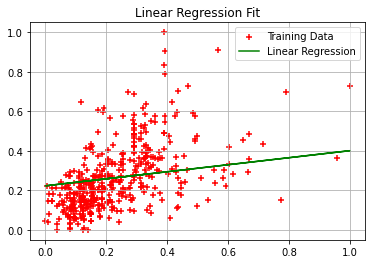

In [26]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], Y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

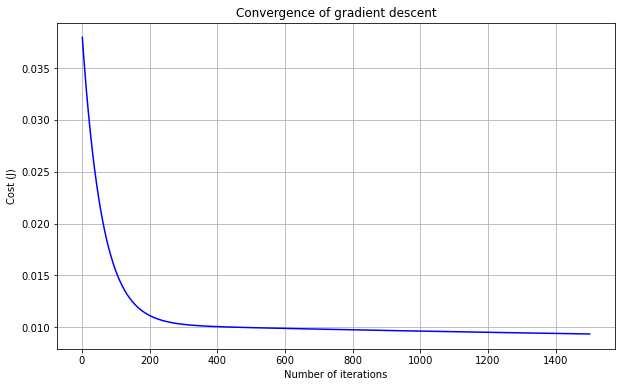

In [27]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')